Linear Seperable Data

In [1]:
import numpy as np
import pandas as pd

In [13]:
X1 = []
for i in range(1,11):
  X1.append(i)
for i in range(21,31):
  X1.append(i)
print("X1",X1)

X2 = []
for i in range(1,11):
  X2.append(i)
for i in range(21,31):
  X2.append(i)
print("X2",X2)

y = []
for i in range(1,11):
  y.append(0)
for i in range(11,21):
  y.append(1)
print("Y",y)

X1 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
X2 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Y [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
df1 = pd.DataFrame({ 'X1' : X1, 'X2' : X2, 'label' : y})
df1.head()

,X1,X2,label
0,1,1,0
1,2,2,0
2,3,3,0
3,4,4,0
4,5,5,0


In [15]:
print(df1)

    X1  X2  label
0    1   1      0
1    2   2      0
2    3   3      0
3    4   4      0
4    5   5      0
5    6   6      0
6    7   7      0
7    8   8      0
8    9   9      0
9   10  10      0
10  21  21      1
11  22  22      1
12  23  23      1
13  24  24      1
14  25  25      1
15  26  26      1
16  27  27      1
17  28  28      1
18  29  29      1
19  30  30      1


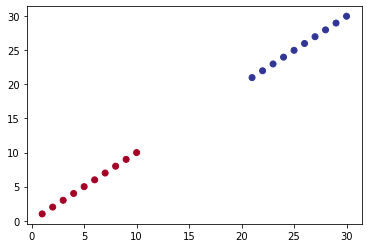

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X1, X2, c = y, cmap = plt.cm.RdYlBu)

In [17]:
df1.label.value_counts()

0    10
1    10
Name: label, dtype: int64

In [18]:
# 75% of the data is selected
train_df = df1.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
val_df = df1.drop(train_df.index)

X_train = train_df.drop('label',axis=1)
X_val = val_df.drop('label',axis=1)
y_train = train_df['label']
y_val = val_df['label']

In [19]:
print(X_train)
print("&&&&&&&&&&&&&&&&&&")
print(X_val)

    X1  X2
19  30  30
3    4   4
18  29  29
6    7   7
13  24  24
4    5   5
0    1   1
17  28  28
12  23  23
11  22  22
15  26  26
10  21  21
9   10  10
2    3   3
16  27  27
&&&&&&&&&&&&&&&&&&
    X1  X2
1    2   2
5    6   6
7    8   8
8    9   9
14  25  25


In [20]:
import tensorflow as tf
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

from keras.optimizers.optimizer_experimental import optimizer
model_1.compile (loss = tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.SGD(), metrics=['accuracy'])

losses = model_1.fit(X_train, y_train,
 
                   validation_data=(X_val, y_val),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                  
                   epochs=5,  # total epoch
 
                   )


Epoch 1/5
1/1 [==============================] - 0s 478ms/step - loss: 6.0997 - accuracy: 0.6000 - val_loss: 12.1994 - val_accuracy: 0.2000
Epoch 2/5
1/1 [==============================] - 0s 30ms/step - loss: 6.0997 - accuracy: 0.6000 - val_loss: 12.1994 - val_accuracy: 0.2000
Epoch 3/5
1/1 [==============================] - 0s 53ms/step - loss: 6.0997 - accuracy: 0.6000 - val_loss: 12.1994 - val_accuracy: 0.2000
Epoch 4/5
1/1 [==============================] - 0s 29ms/step - loss: 6.0997 - accuracy: 0.6000 - val_loss: 12.1994 - val_accuracy: 0.2000
Epoch 5/5
1/1 [==============================] - 0s 33ms/step - loss: 6.0997 - accuracy: 0.6000 - val_loss: 12.1994 - val_accuracy: 0.2000


Single Layer Perceptron

In [21]:
from sklearn.datasets import make_circles
import pandas as pd

In [23]:
samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 50)

print('X : ', X)
print('\n')
print('y : ', y)

X :  [[-0.65968806 -0.78138559]
 [ 0.83905384 -0.42990387]
 [-0.18755897 -0.73184626]
 ...
 [ 0.30997602 -0.74198965]
 [ 0.95848943 -0.31339139]
 [-0.58074025  0.57315043]]


y :  [0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0

In [24]:
circle = pd.DataFrame({ 'X0' : X[:, 0], 'X1' : X[:, 1], 'label' : y})
circle.head()

,X0,X1,label
0,-0.659688,-0.781386,0
1,0.839054,-0.429904,0
2,-0.187559,-0.731846,1
3,0.994816,0.200099,0
4,0.803334,-0.231507,1


In [25]:
circle.label.value_counts()

0    500
1    500
Name: label, dtype: int64

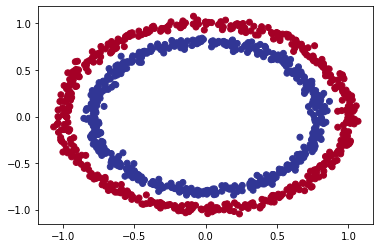

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [33]:
import tensorflow as tf
tf.random.set_seed(50)
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [34]:
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.SGD(), metrics = ['accuracy'])

In [35]:
model_1.fit(X, y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 2s 4ms/step - loss: 5.1997 - accuracy: 0.4470
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 4.9429 - accuracy: 0.4420
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 4.2887 - accuracy: 0.4650
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 4.0477 - accuracy: 0.5030
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 4.7516 - accuracy: 0.5550
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 4.1359 - accuracy: 0.5170
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 4.0131 - accuracy: 0.5140
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 5.9745 - accuracy: 0.5130
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


In [36]:
tf.random.set_seed(50)
model2 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [37]:
from keras.optimizers.optimizer_experimental import optimizer
model2.compile (loss = tf.keras.losses.BinaryCrossentropy(),optimizer = tf.keras.optimizers.SGD(), metrics=['accuracy'])

In [38]:
model2.fit(X,y,epochs=10)

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 5.6130 - accuracy: 0.4710
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 4.6304 - accuracy: 0.4630
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 4.7148 - accuracy: 0.4810
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 7.6246 - accuracy: 0.5000


In [39]:
tf.random.set_seed(50)

In [40]:
model3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)])

In [41]:
model3.compile(optimizer = tf.keras.optimizers.SGD(),
               loss = tf.keras.losses.BinaryCrossentropy(),
               metrics= ['accuracy']
               )

In [46]:
model3.fit(X,y, epochs=150)

Epoch 1/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.4950
Epoch 2/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.4860
Epoch 3/150
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5080
Epoch 4/150
32/32 [==============================] - 0s 8ms/step - loss: 0.6955 - accuracy: 0.4690
Epoch 5/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.4820
Epoch 6/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5160
Epoch 7/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.4660
Epoch 8/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4670
Epoch 9/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4940
Epoch 10/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.4630
Epoch 11/

In [47]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               300       
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


Multi Layer Perceptron

In [84]:
model4 = tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')])

In [86]:
model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               loss = tf.keras.losses.BinaryCrossentropy(),
               metrics = ['accuracy'])

In [87]:
model4.fit(X,y,epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 3ms/step - loss: 0.6877 - accuracy: 0.5150
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5750
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5530
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6651 - accuracy: 0.5720
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6340
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6450
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6520
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6750
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.8060
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.8390
Epoch 11/

In [79]:
import numpy as np

In [80]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] 
  # Make predictions using the trained model
  y_pred = model.predict(x_in)
  # Check for multi-class
  if len(y_pred[0]) > 1:
     print("doing multiclass classification...")
     # We have to reshape our predictions to get them ready for plotting
     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
     print("doing binary classifcation...")
     y_pred = np.round(y_pred).reshape(xx.shape)
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 857us/step
doing binary classifcation...
313/313 [==============================] - 0s 881us/step
doing binary classifcation...


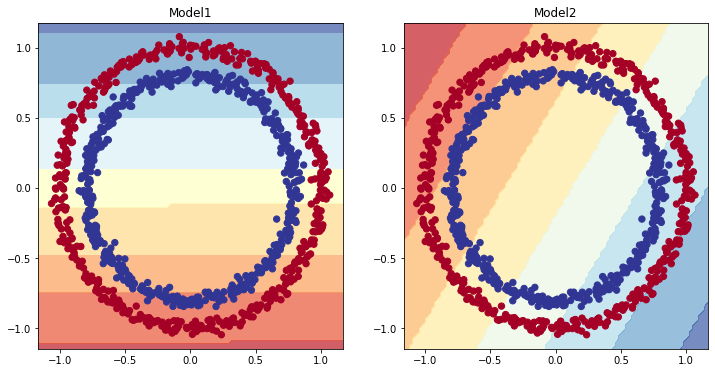

In [81]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model1")
plot_decision_boundary(model_1, X=X, y=y)

plt.subplot(1, 2, 2)
plt.title("Model2")
plot_decision_boundary(model2, X=X, y=y)
plt.show()


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 997us/step
doing binary classifcation...


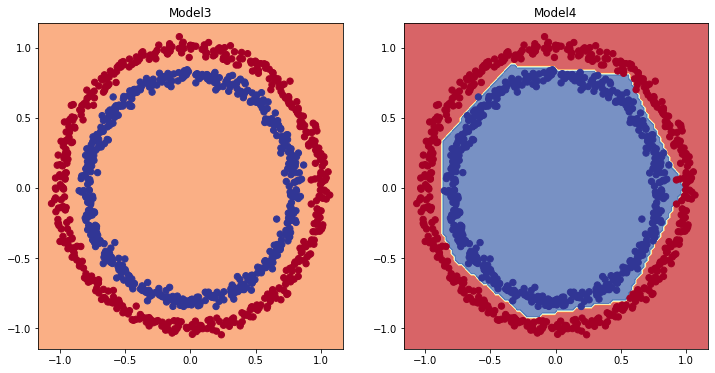

In [82]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model3")
plot_decision_boundary(model3, X=X, y=y)

plt.subplot(1, 2, 2)
plt.title("Model4")
plot_decision_boundary(model4, X=X, y=y)
plt.show()
